In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\connor\PycharmProjects\trading\data\analytics\analytics_voo.csv', header=0)
df['date'] = pd.to_datetime(df['date'])

In [3]:
# # issues rendering in notebook so render in browser instead
# import plotly.io as pio
# pio.renderers.default = "browser"
# 
# fig = px.line(df, x='date', y='close', title='VOO')
# #fig.write_html(r'C:\Users\connor\PycharmProjects\trading\visuals\voo_intraday.html')
# fig.show()

In [4]:
#max and min record values at different parts of the day    

# create column of just time
df['time_of_day'] = df['date'].dt.time
df['day'] = df['date'].dt.date

# get daily high
df['daily_high'] = df.groupby(['day'])['close'].transform('max')

# get daily low
df['daily_low'] = df.groupby(['day'])['close'].transform('min')

# reduce df to just times with the daily high
idx = df.groupby('day')['close'].idxmax()
df_daily_high = df.loc[idx]

<Axes: xlabel='date'>

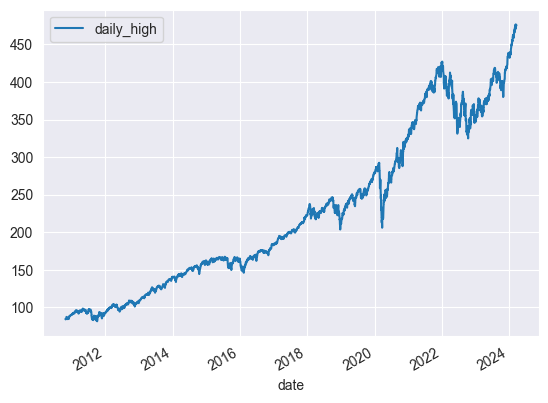

In [5]:
df.plot(x='date', y='daily_high')

<Axes: xlabel='date'>

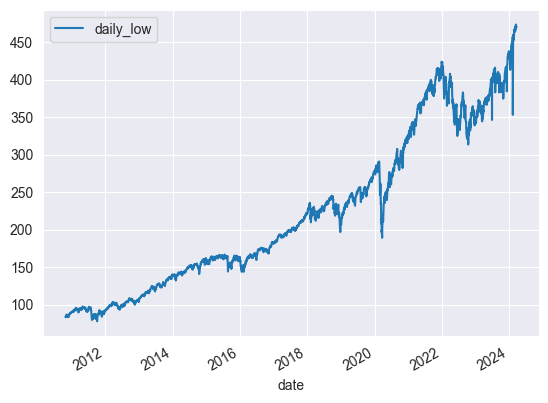

In [6]:
df.plot(x='date', y='daily_low')

## Observations

It looks like some people got incredibly unlucky with their market sells. There appears to be 2 such moments where a buyer put in an incredibly low bid and despite the high volume, there was a moment when a seller selling at presumably the market rate had no other choice than the lowest seller.

The daily high and low graphs look roughly the same but maybe slightly shifted. So day rates don't dramatically impact the overall trend.

In [7]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'join_date', 'Id',
       'Date', 'DateLongDescription', 'DateShortDescription', 'DayLongName',
       'DayShortName', 'MonthLongName', 'MonthShortName', 'CalendarDay',
       'CalendarWeek', 'CalendarWeekStartDateId', 'CalendarWeekEndDateId',
       'CalendarDayInWeek', 'CalendarMonth', 'CalendarMonthStartDateId',
       'CalendarMonthEndDateId', 'CalendarNumberOfDaysInMonth',
       'CalendarDayInMonth', 'CalendarQuarter', 'CalendarQuarterStartDateId',
       'CalendarQuarterEndDateId', 'CalendarQuarterStartDate',
       'CalendarNumberOfDaysInQuarter', 'CalendarDayInQuarter', 'CalendarYear',
       'CalendarYearEndDateId', 'CalendarYearStartDate',
       'CalendarNumberOfDaysInYear', 'month_join_key', 'year_join_key',
       'seven_day_ema', 'CPALTT01USM657N', 'DFF', 'EXPINF10YR', 'GDPC1',
       'RSXFS', 'T10YFF', 'UNRATE', 'macd', 'macd_signal', 'macd_hist',
       'daily_obv', 'target', 'time_of_day', 'day', 'daily_high', '

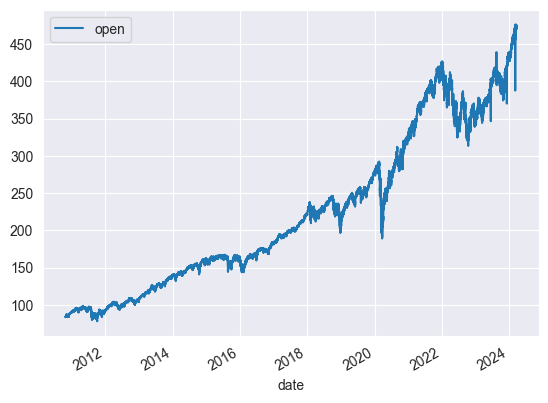

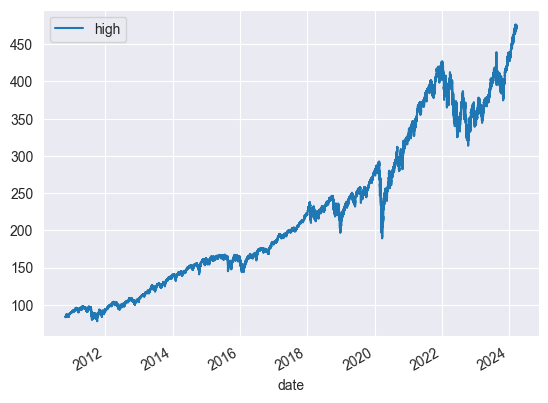

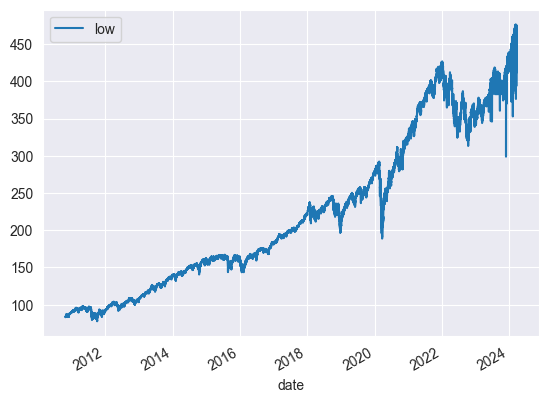

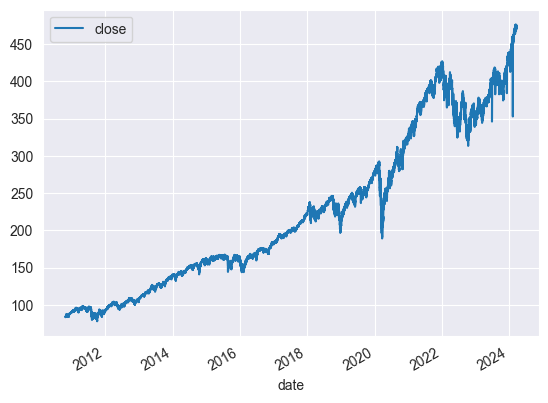

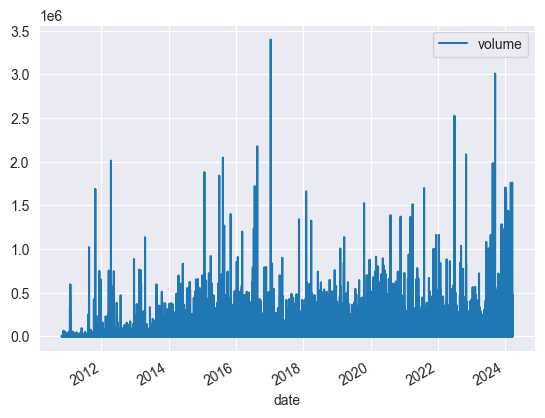

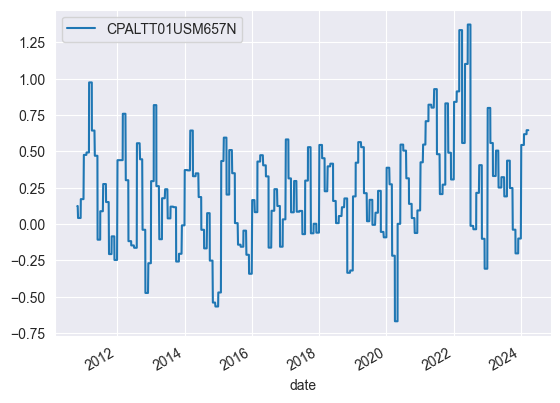

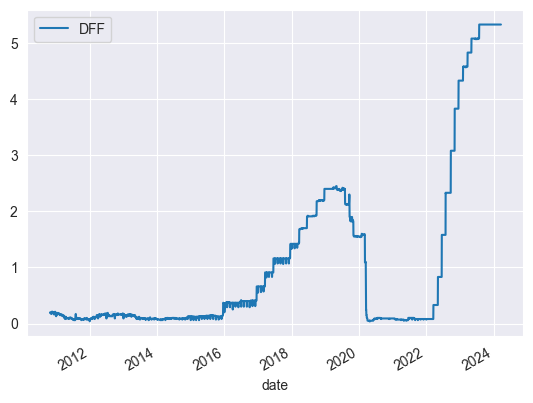

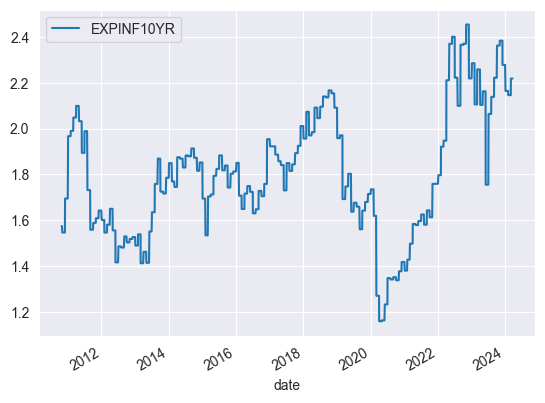

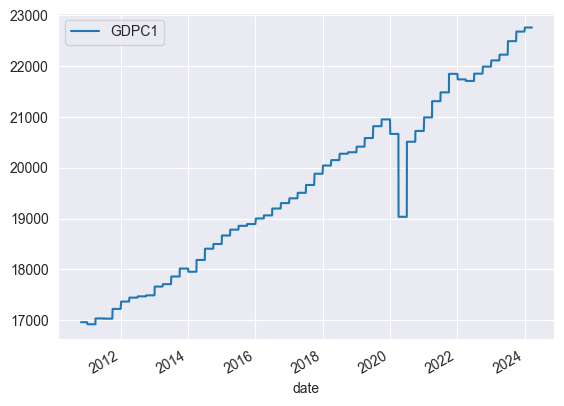

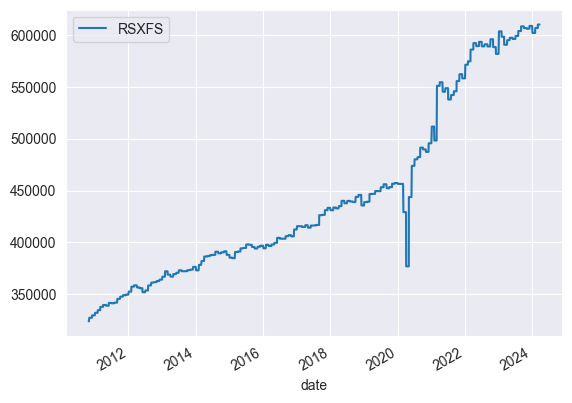

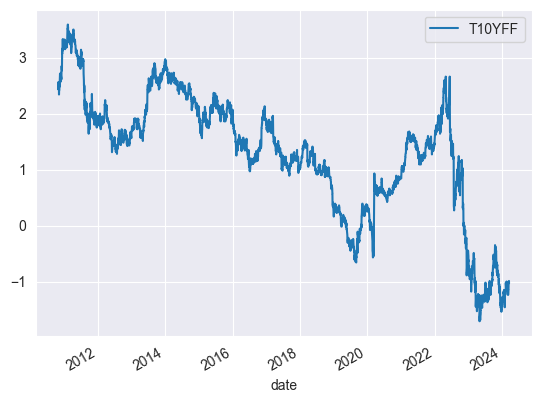

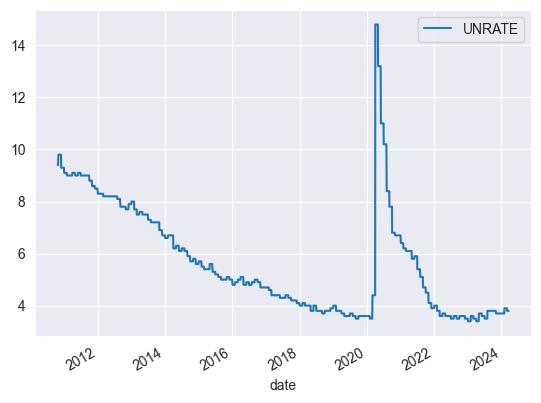

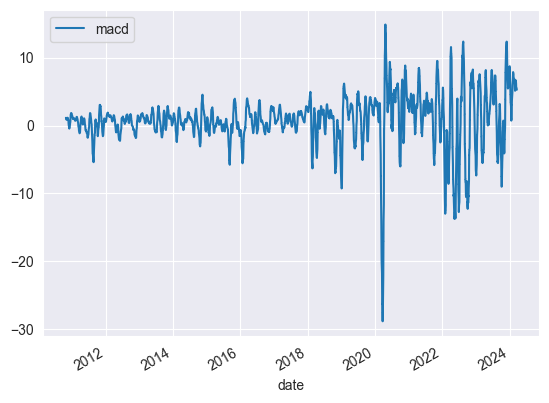

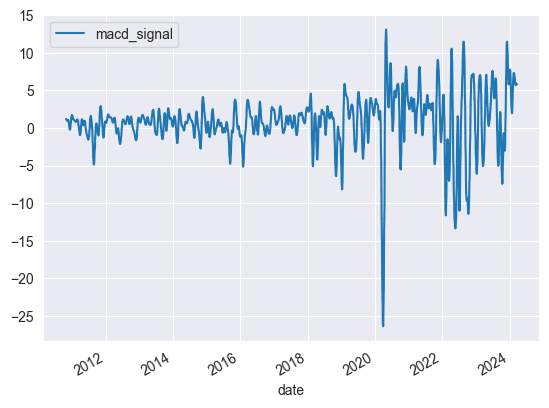

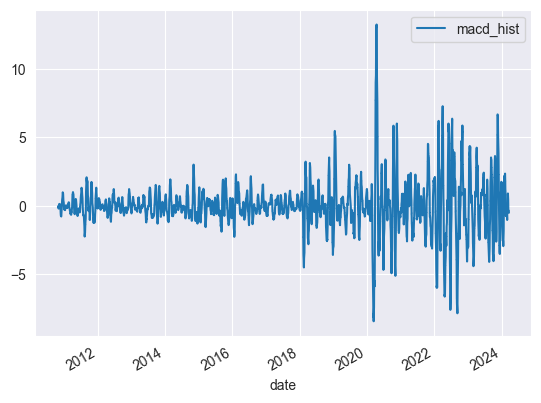

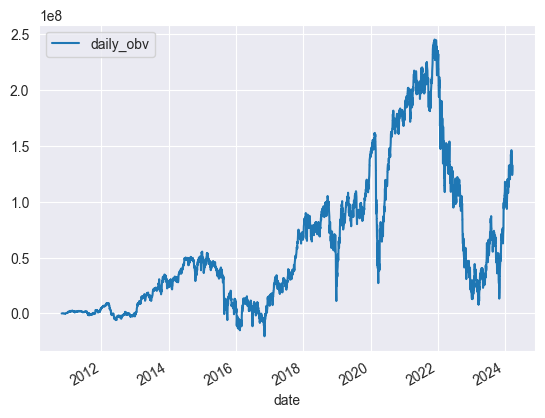

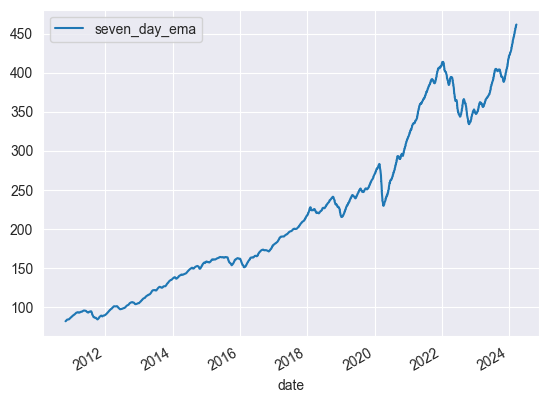

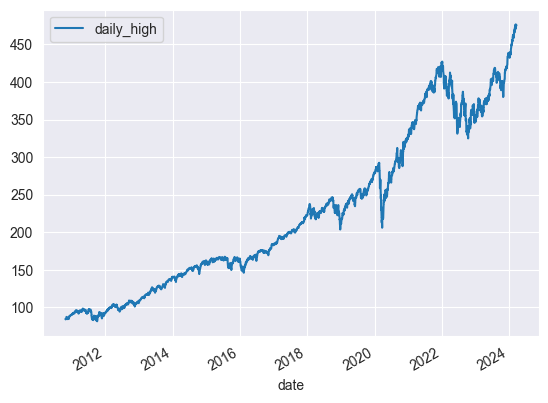

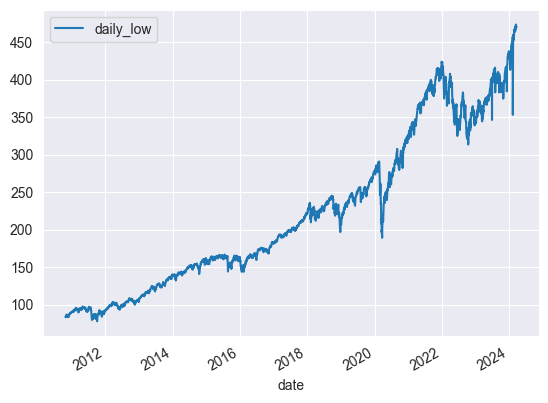

In [8]:
Y_LIST = ['open', 'high', 'low', 'close', 'volume', 'CPALTT01USM657N', 'DFF', 'EXPINF10YR', 'GDPC1', 'RSXFS', 'T10YFF', 'UNRATE', 'macd', 'macd_signal', 'macd_hist', 'daily_obv', 'seven_day_ema', 'daily_high', 'daily_low']

for column in Y_LIST:
    df.plot(x='date', y=column)

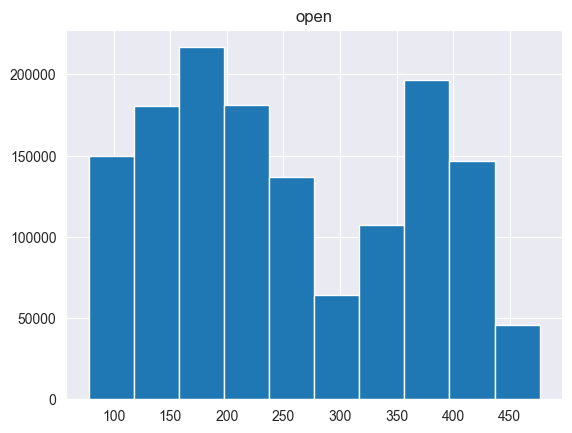

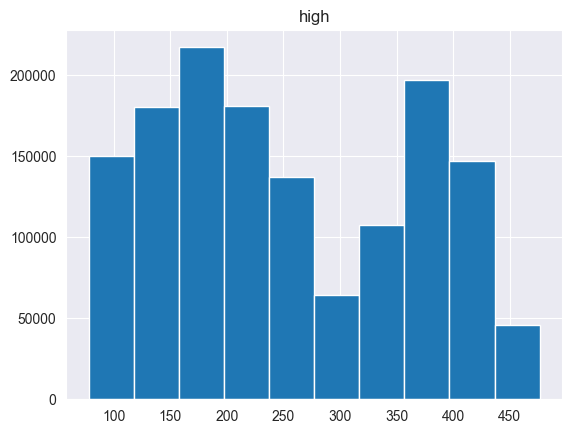

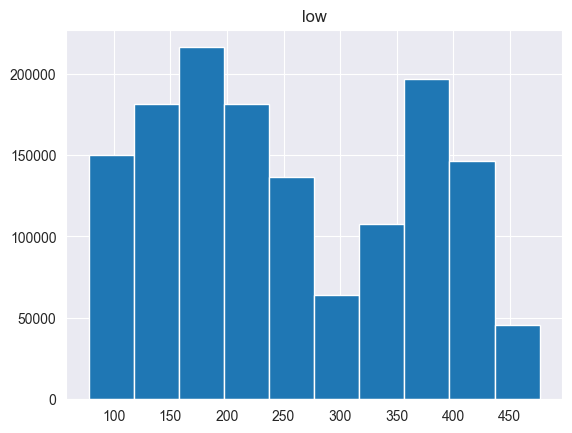

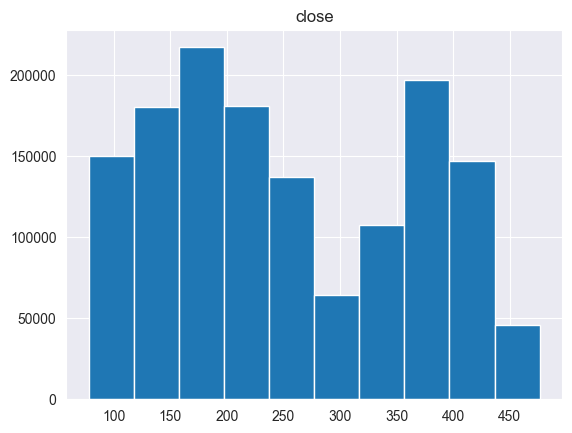

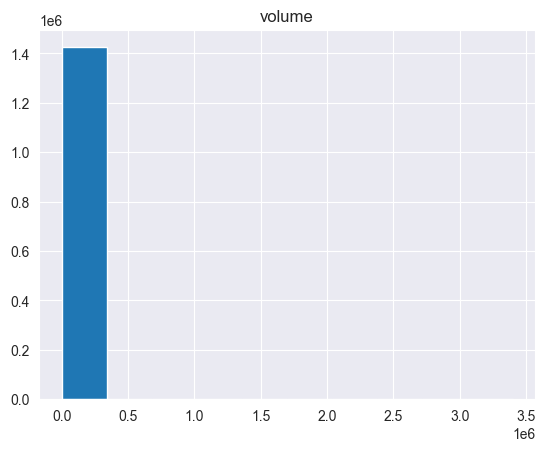

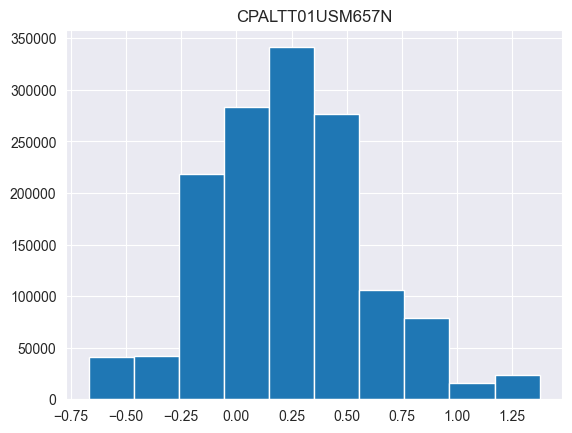

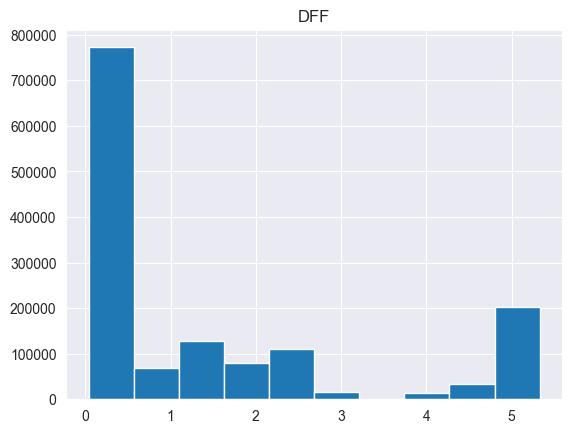

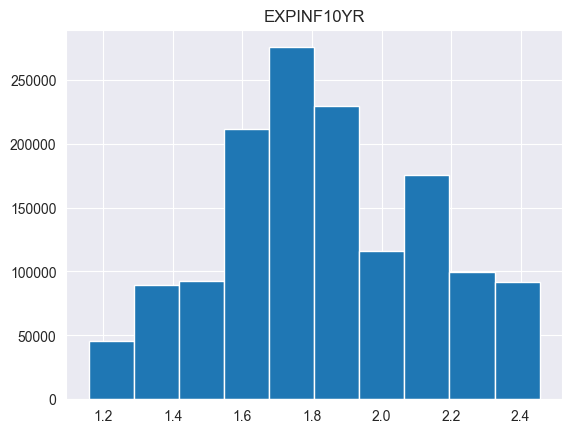

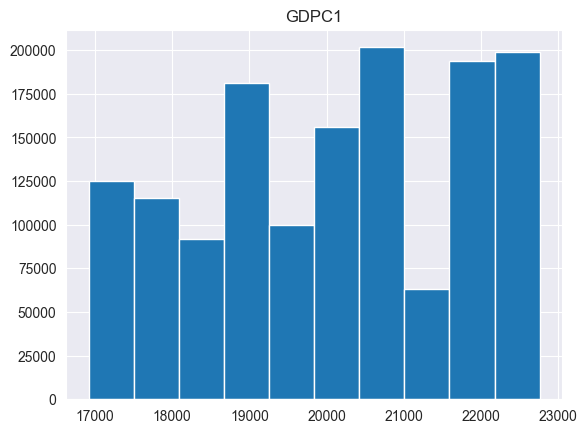

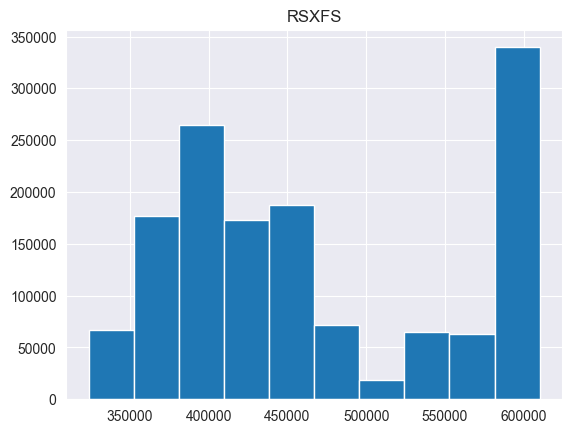

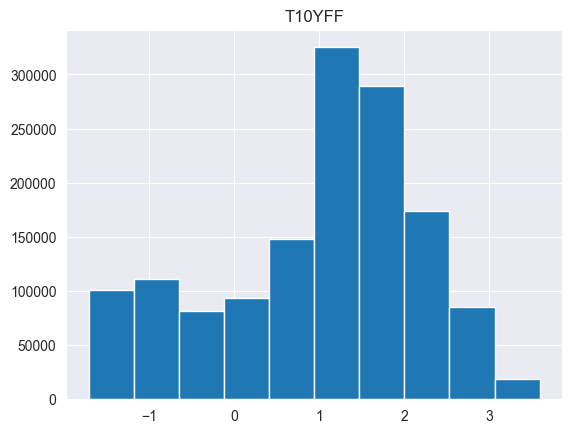

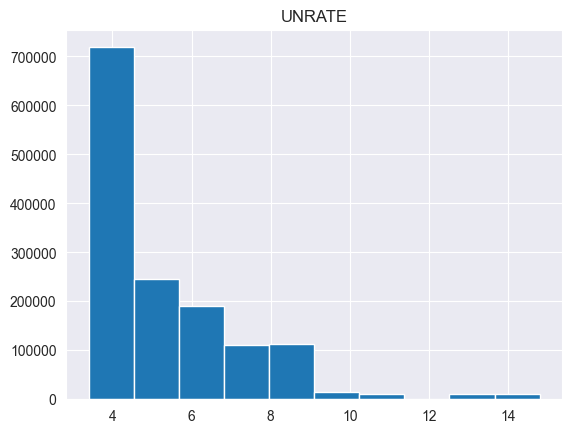

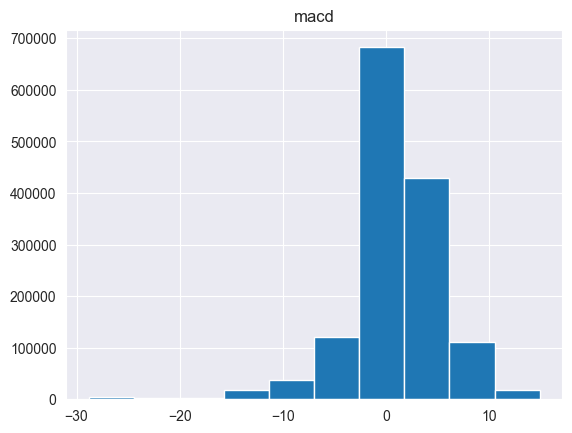

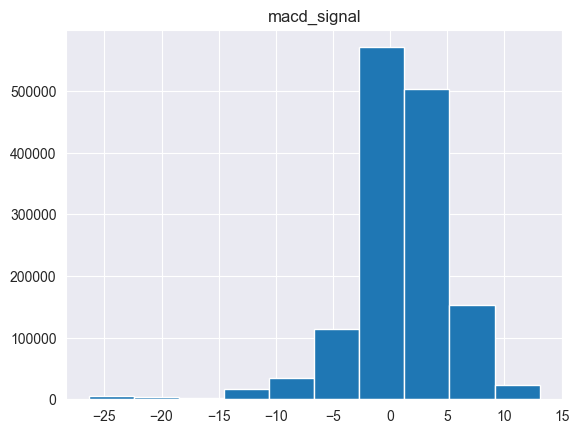

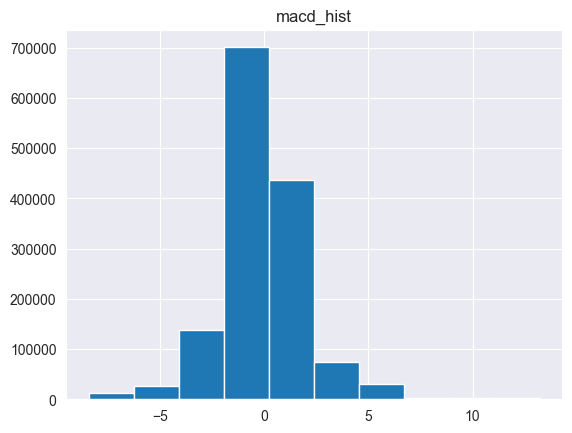

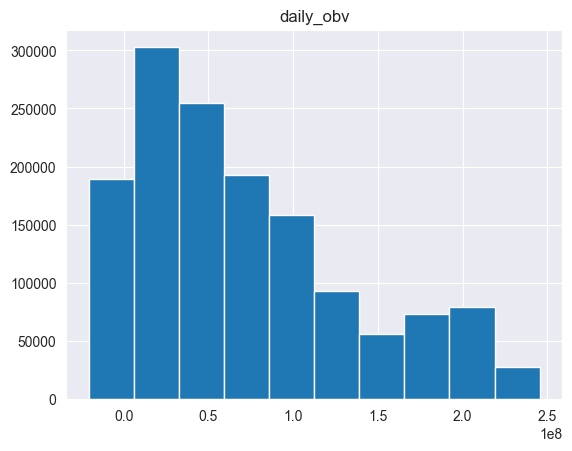

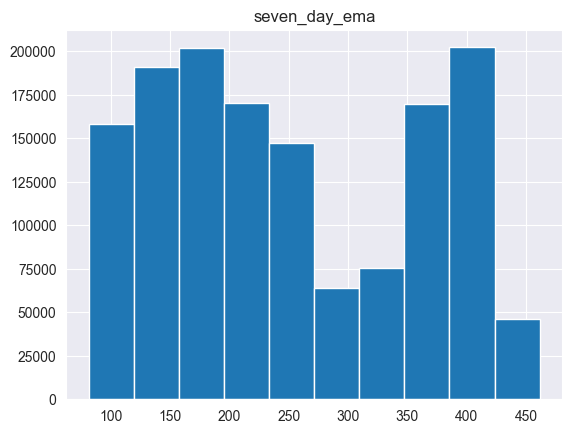

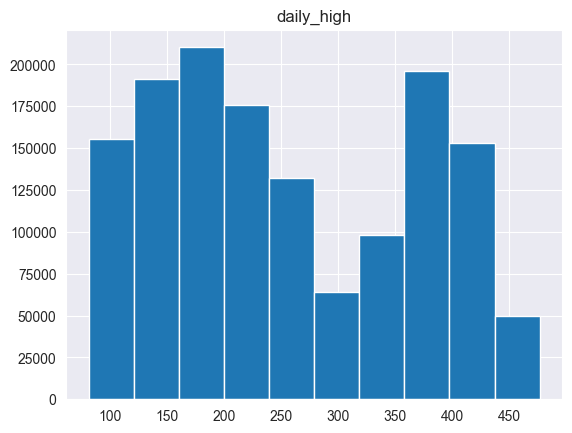

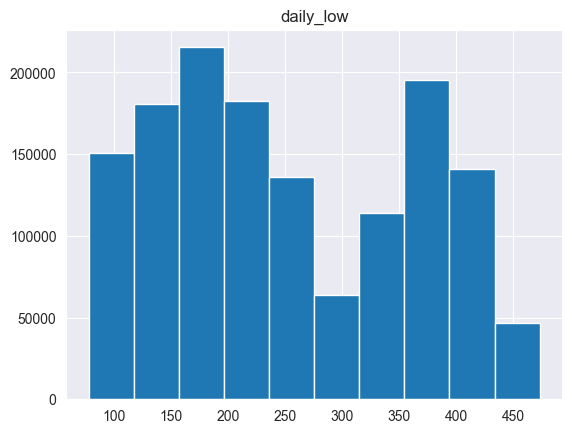

In [9]:
Y_LIST = ['open', 'high', 'low', 'close', 'volume', 'CPALTT01USM657N', 'DFF', 'EXPINF10YR', 'GDPC1', 'RSXFS', 'T10YFF', 'UNRATE', 'macd', 'macd_signal', 'macd_hist', 'daily_obv', 'seven_day_ema', 'daily_high', 'daily_low']

for column in Y_LIST:
    df.hist(column)

<Axes: >

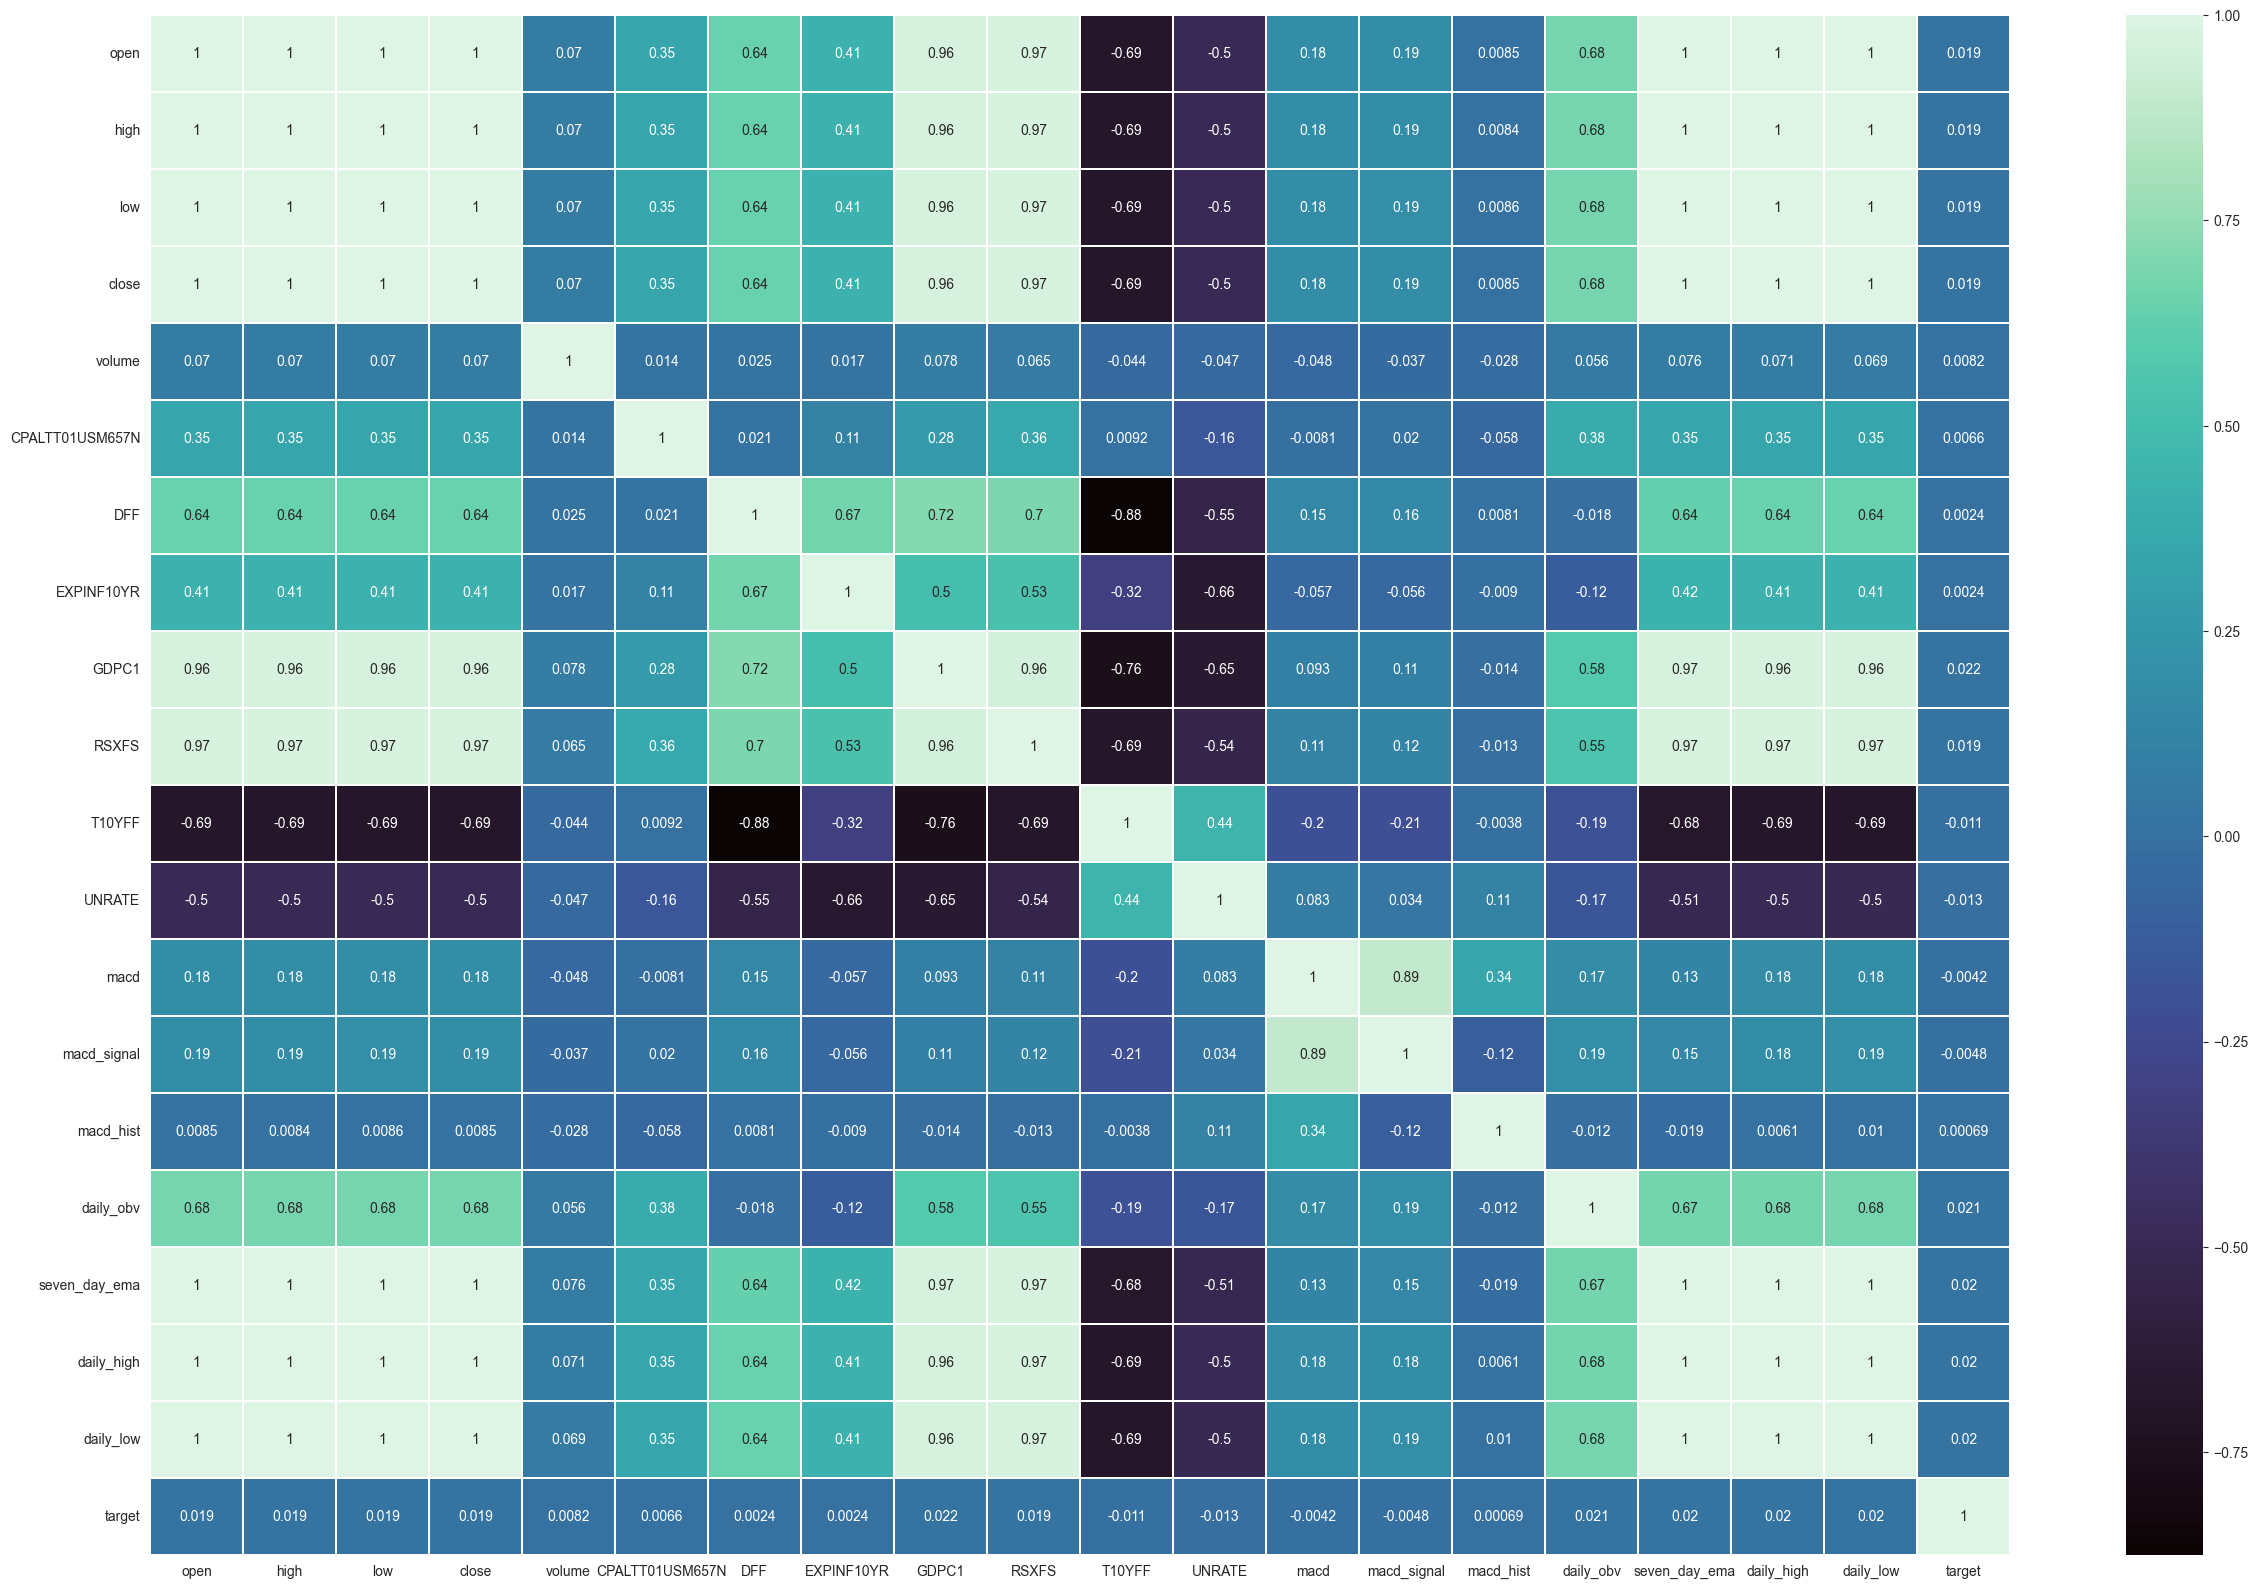

In [10]:
# Correlation Heatmap
correlation_fields = Y_LIST.copy()
correlation_fields.append('target')
correlation = df[correlation_fields].corr()

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(correlation, annot = True, linewidth = .2, cmap = 'mako')